In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

#  load dataset 

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

sns.set(rc={'figure.figsize':(7.5,3.8)})
data = pd.read_csv("diabetic_data.csv")

In [3]:
data.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [4]:
data.shape

(101766, 50)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

# preprocessing dataset

In [6]:
data.replace("?",np.nan,inplace = True)
(data.isna().sum()/len(data)*100).sort_values(ascending=False).head(10)

weight               96.858479
medical_specialty    49.082208
payer_code           39.557416
race                  2.233555
diag_3                1.398306
diag_2                0.351787
diag_1                0.020636
encounter_id          0.000000
tolazamide            0.000000
glyburide             0.000000
dtype: float64

In [7]:
data = data.drop('weight',1)
data = data.drop('payer_code', 1)
data = data.drop('medical_specialty',1)
(data.isna().sum()/len(data)*100).sort_values(ascending=False).head(10)

race             2.233555
diag_3           1.398306
diag_2           0.351787
diag_1           0.020636
encounter_id     0.000000
tolazamide       0.000000
glyburide        0.000000
tolbutamide      0.000000
pioglitazone     0.000000
rosiglitazone    0.000000
dtype: float64

In [8]:
print(data['race'].value_counts())

Caucasian          76099
AfricanAmerican    19210
Hispanic            2037
Other               1506
Asian                641
Name: race, dtype: int64


In [9]:
data['race'] = data['race'].fillna('Caucasian')

In [10]:
data['diag_1'] = data['diag_1'].fillna('Unknown')
data['diag_2'] = data['diag_2'].fillna('Unknown')
data['diag_3'] = data['diag_3'].fillna('Unknown')

In [11]:
data.isna().sum().sort_values(ascending = False).head()

encounter_id     0
tolazamide       0
acetohexamide    0
glipizide        0
glyburide        0
dtype: int64

In [12]:
data.describe()

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,1.017660e+05,1.017660e+05,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,1.652016e+08,5.433040e+07,2.024006,3.715642,5.754437,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,7.422607
std,1.026403e+08,3.869636e+07,1.445403,5.280166,4.064081,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,1.933600
min,1.252200e+04,1.350000e+02,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,8.496119e+07,2.341322e+07,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,1.523890e+08,4.550514e+07,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,2.302709e+08,8.754595e+07,3.000000,4.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,4.438672e+08,1.895026e+08,8.000000,28.000000,25.000000,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


In [13]:
obj_col = data.columns[data.dtypes==object]
print(obj_col,'\n','total number of categorical columns:',len(obj_col))

Index(['race', 'gender', 'age', 'diag_1', 'diag_2', 'diag_3', 'max_glu_serum',
       'A1Cresult', 'metformin', 'repaglinide', 'nateglinide',
       'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide',
       'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose',
       'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton',
       'insulin', 'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object') 
 total number of categorical columns: 34


In [14]:
num_col = data.columns[data.dtypes==np.int64]
print(num_col,'\n','total number of numerical columns:',len(num_col))

Index(['encounter_id', 'patient_nbr', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'time_in_hospital',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient',
       'number_diagnoses'],
      dtype='object') 
 total number of numerical columns: 13


In [15]:
data['admission_type_id'] = data['admission_type_id'].astype('object')
data['discharge_disposition_id'] = data['discharge_disposition_id'].astype('object')
data['admission_source_id'] = data['admission_source_id'].astype('object')

In [16]:
data = data.drop('encounter_id',1)
data = data.drop('patient_nbr',1)

# Train test split

In [17]:
data1 = data.copy()

In [18]:
from sklearn.model_selection import train_test_split
train_index, test_index = train_test_split(np.array(data1.index),
                                           train_size=0.5,random_state=41)

In [19]:
train = data1.loc[train_index,:]
test = data1.loc[test_index,:]

In [20]:
y_train = train['readmitted']
y_test = test['readmitted']

In [21]:
train.drop('readmitted',axis = 1,inplace = True)
test.drop('readmitted',axis = 1,inplace = True)

In [22]:
train.shape, test.shape

((50883, 44), (50883, 44))

In [23]:
X_train_1 = train.copy()
y_train_1 = y_train.copy()

In [24]:
X_test_1 = test.copy()
y_test_1 = y_test.copy()

# Initial data analysis

<AxesSubplot:xlabel='readmitted', ylabel='count'>

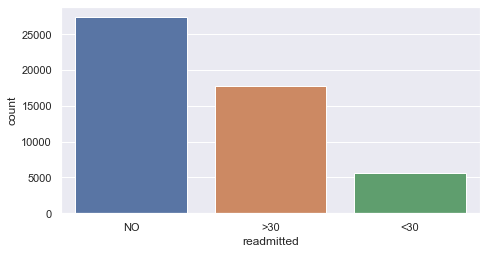

In [25]:
# response
sns.countplot(y_train)

In [26]:
# replace "NO" and "<30" with 0, ">30" with 1
maps={"NO":1,"<30":0,">30":1}
y_train_1 = y_train_1.map(maps)
y_test_1 = y_test_1.map(maps)

[Text(0.5, 1.0, 'after reclassify')]

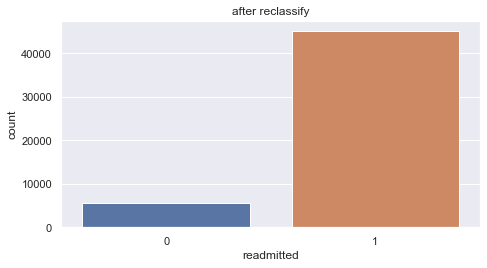

In [27]:
sns.countplot(y_train_1).set(title = 'after reclassify')

### Handling class imbalance

In [28]:
obj_col = X_train_1.columns[X_train_1.dtypes==object]
print(obj_col,'\n','total number of categorical columns:',len(obj_col))

Index(['race', 'gender', 'age', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'diag_1', 'diag_2',
       'diag_3', 'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide',
       'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide',
       'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone',
       'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide',
       'examide', 'citoglipton', 'insulin', 'glyburide-metformin',
       'glipizide-metformin', 'glimepiride-pioglitazone',
       'metformin-rosiglitazone', 'metformin-pioglitazone', 'change',
       'diabetesMed'],
      dtype='object') 
 total number of categorical columns: 36


In [29]:
cat_index = list()
for i in obj_col:
    index = X_train_1.columns.get_loc(i)
    cat_index.append(index)
    

In [30]:
len(cat_index)

36

In [31]:
from imblearn.over_sampling import SMOTENC
smnc = SMOTENC(categorical_features=cat_index, random_state=41,sampling_strategy = 0.6)

SMOTE_X, SMOTE_y = smnc.fit_resample(X_train_1, y_train_1)

# Explortary data analysis

In [32]:
SMOTE_y.value_counts()

1    45229
0    27137
Name: readmitted, dtype: int64

<AxesSubplot:xlabel='readmitted', ylabel='count'>

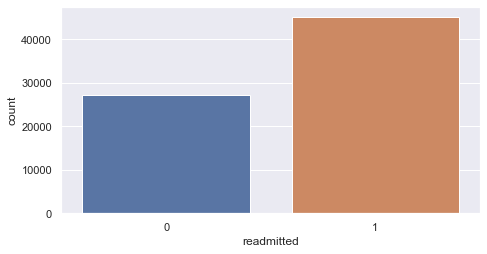

In [33]:
# response
sns.countplot(SMOTE_y)

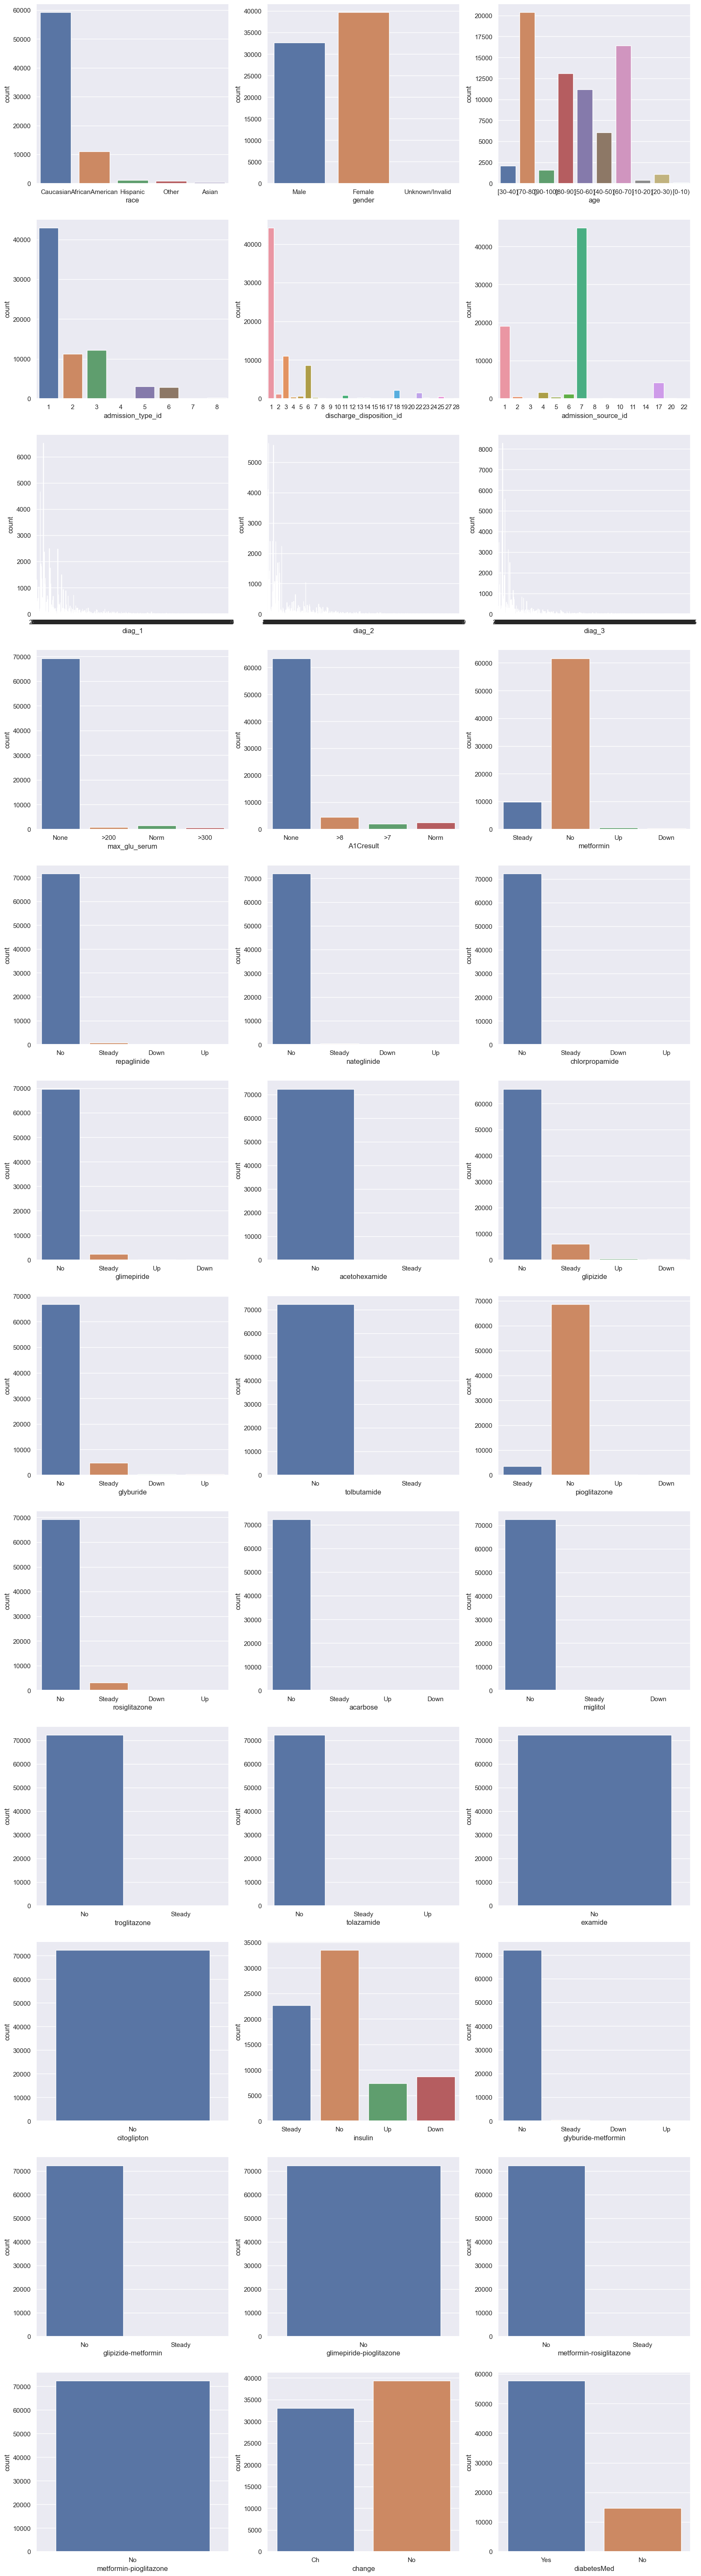

In [34]:
# categorical data - countplot
fig,ax = plt.subplots(12,3,figsize=(20,80),dpi=100)
for i in range(1,37):
    plt.subplot(12,3,i)
    sns.countplot(x = SMOTE_X[obj_col[i-1]])

In [35]:
num_col = data.columns[data.dtypes==np.int64]
print(num_col,'\n','total number of numerical columns:',len(num_col))

Index(['time_in_hospital', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_outpatient', 'number_emergency',
       'number_inpatient', 'number_diagnoses'],
      dtype='object') 
 total number of numerical columns: 8


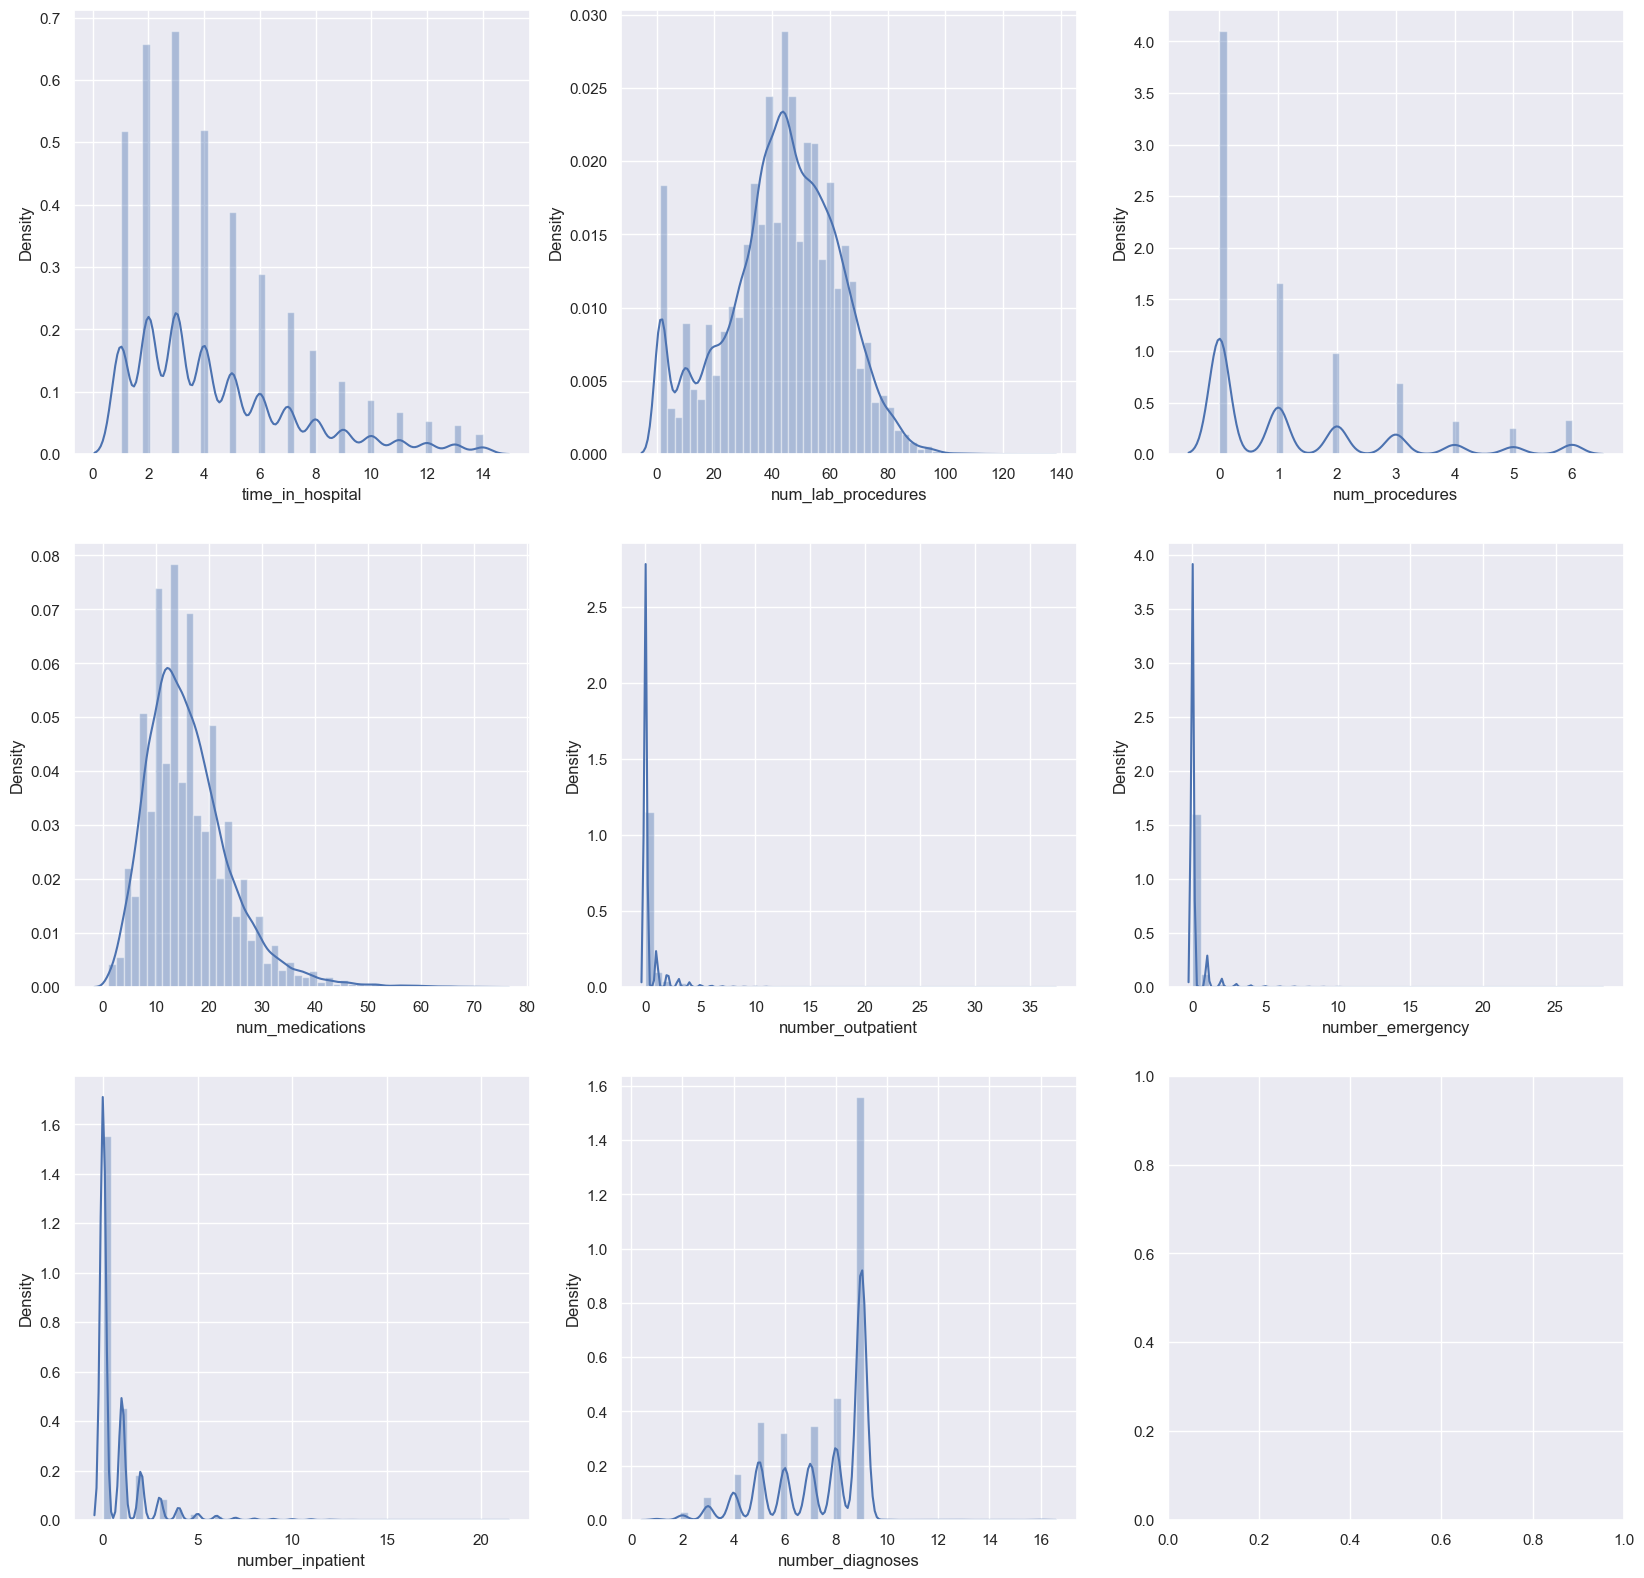

In [36]:
# numerical data - distribution
fig,ax = plt.subplots(3,3,figsize=(20,20),dpi=100)
for i in range(1,9):
    plt.subplot(3,3,i)
    sns.distplot(SMOTE_X[num_col[i-1]])

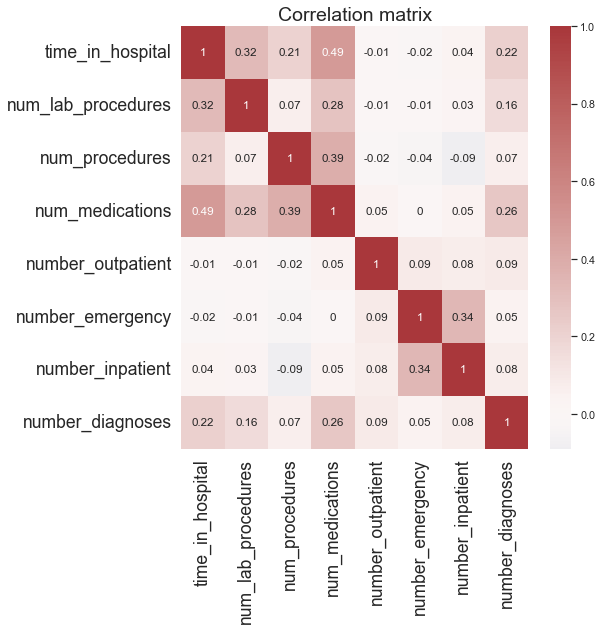

In [37]:
# heat map btw numerical data
plt.figure(figsize=(8,8),dpi = 70)
sns.heatmap(SMOTE_X[num_col].corr().round(2),
            xticklabels=num_col,
            yticklabels=num_col,
            cmap='vlag',center=0,annot=True)
plt.title('Correlation matrix',fontsize=20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18,rotation=360)
plt.show()

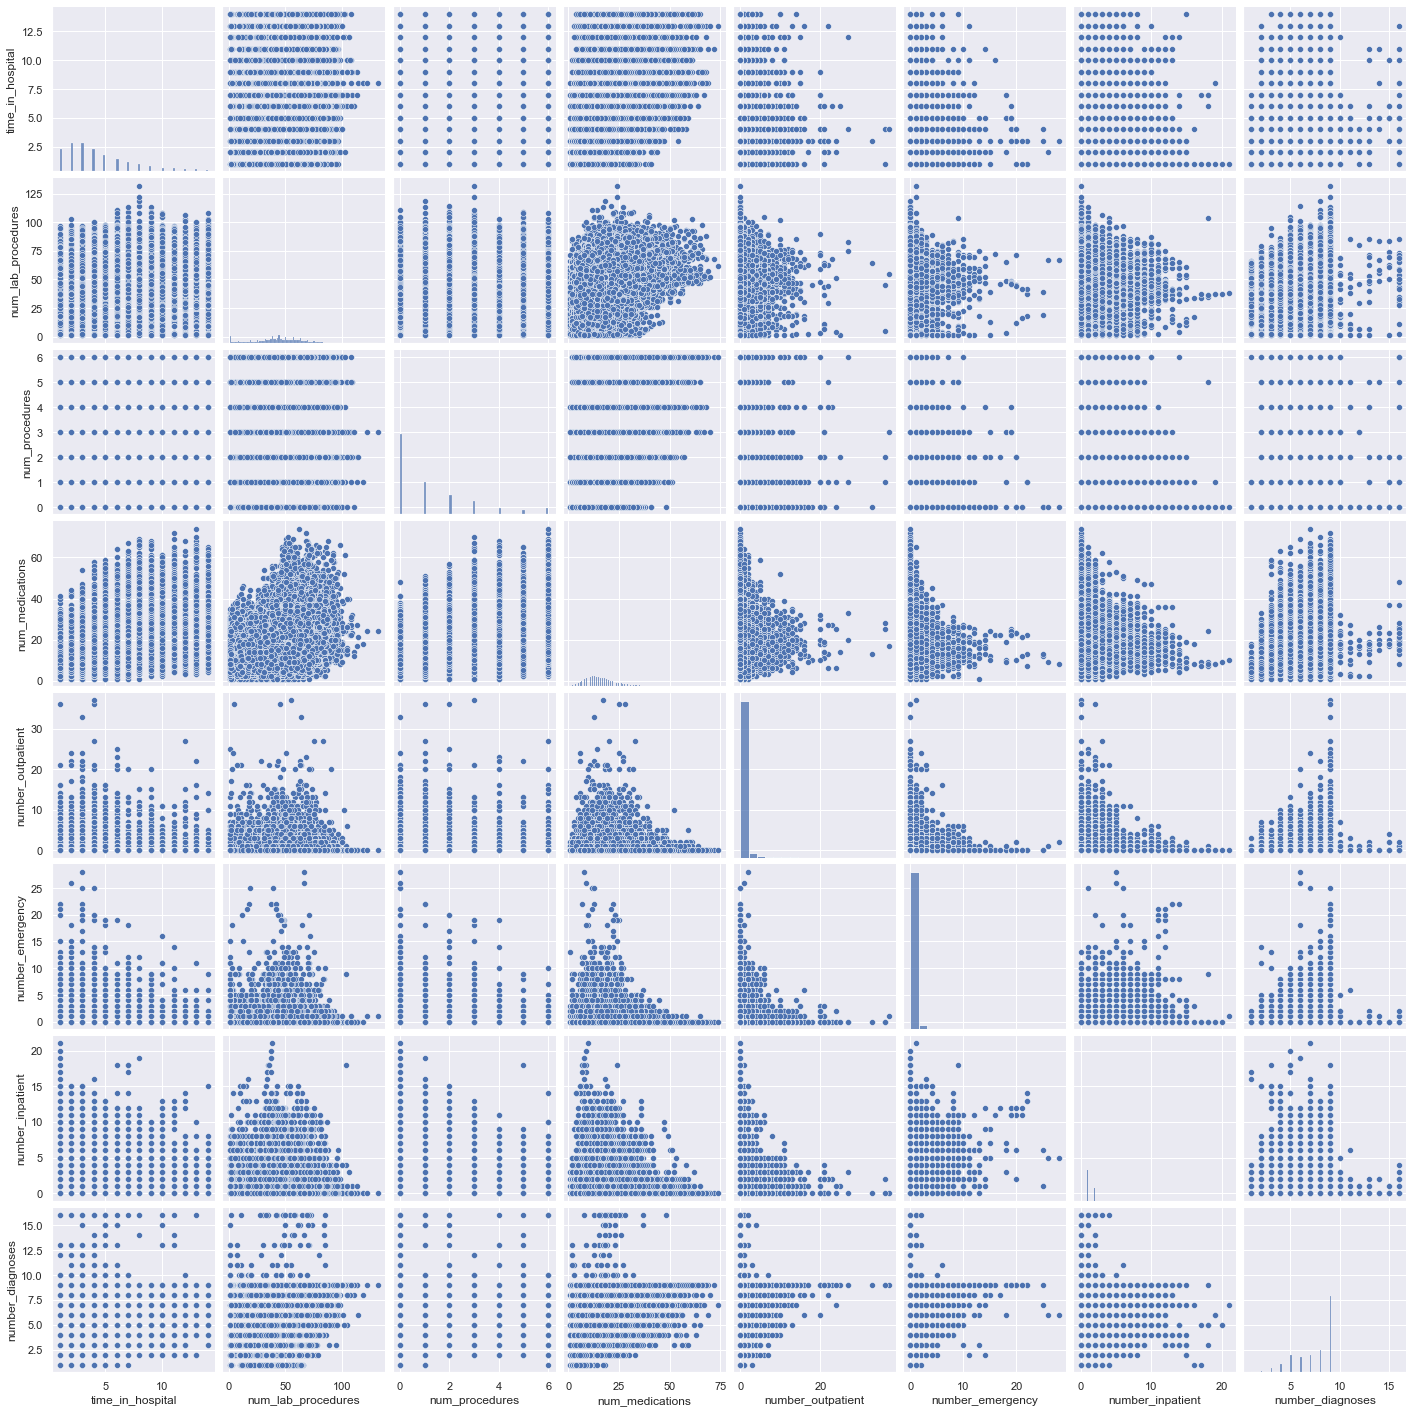

In [38]:
sns.pairplot(SMOTE_X[num_col])
plt.show()

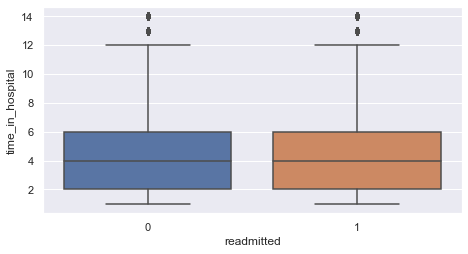

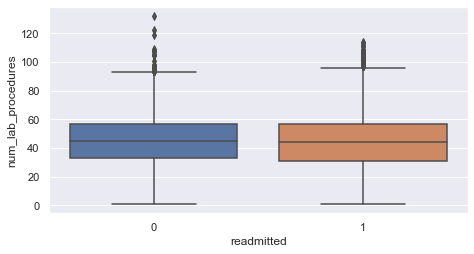

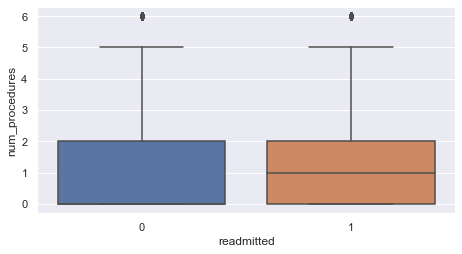

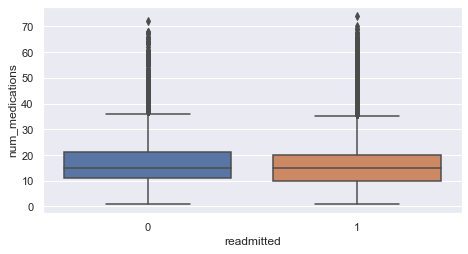

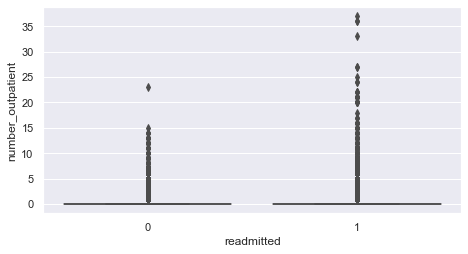

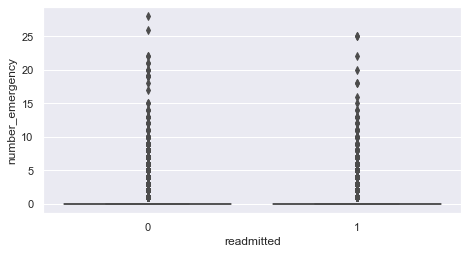

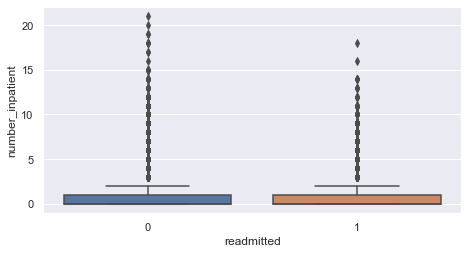

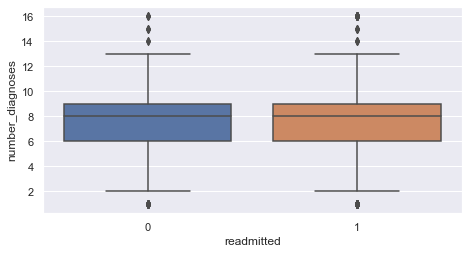

In [39]:
for i in num_col:
    sns.boxplot(x=SMOTE_y, y=SMOTE_X[i])
    plt.show()

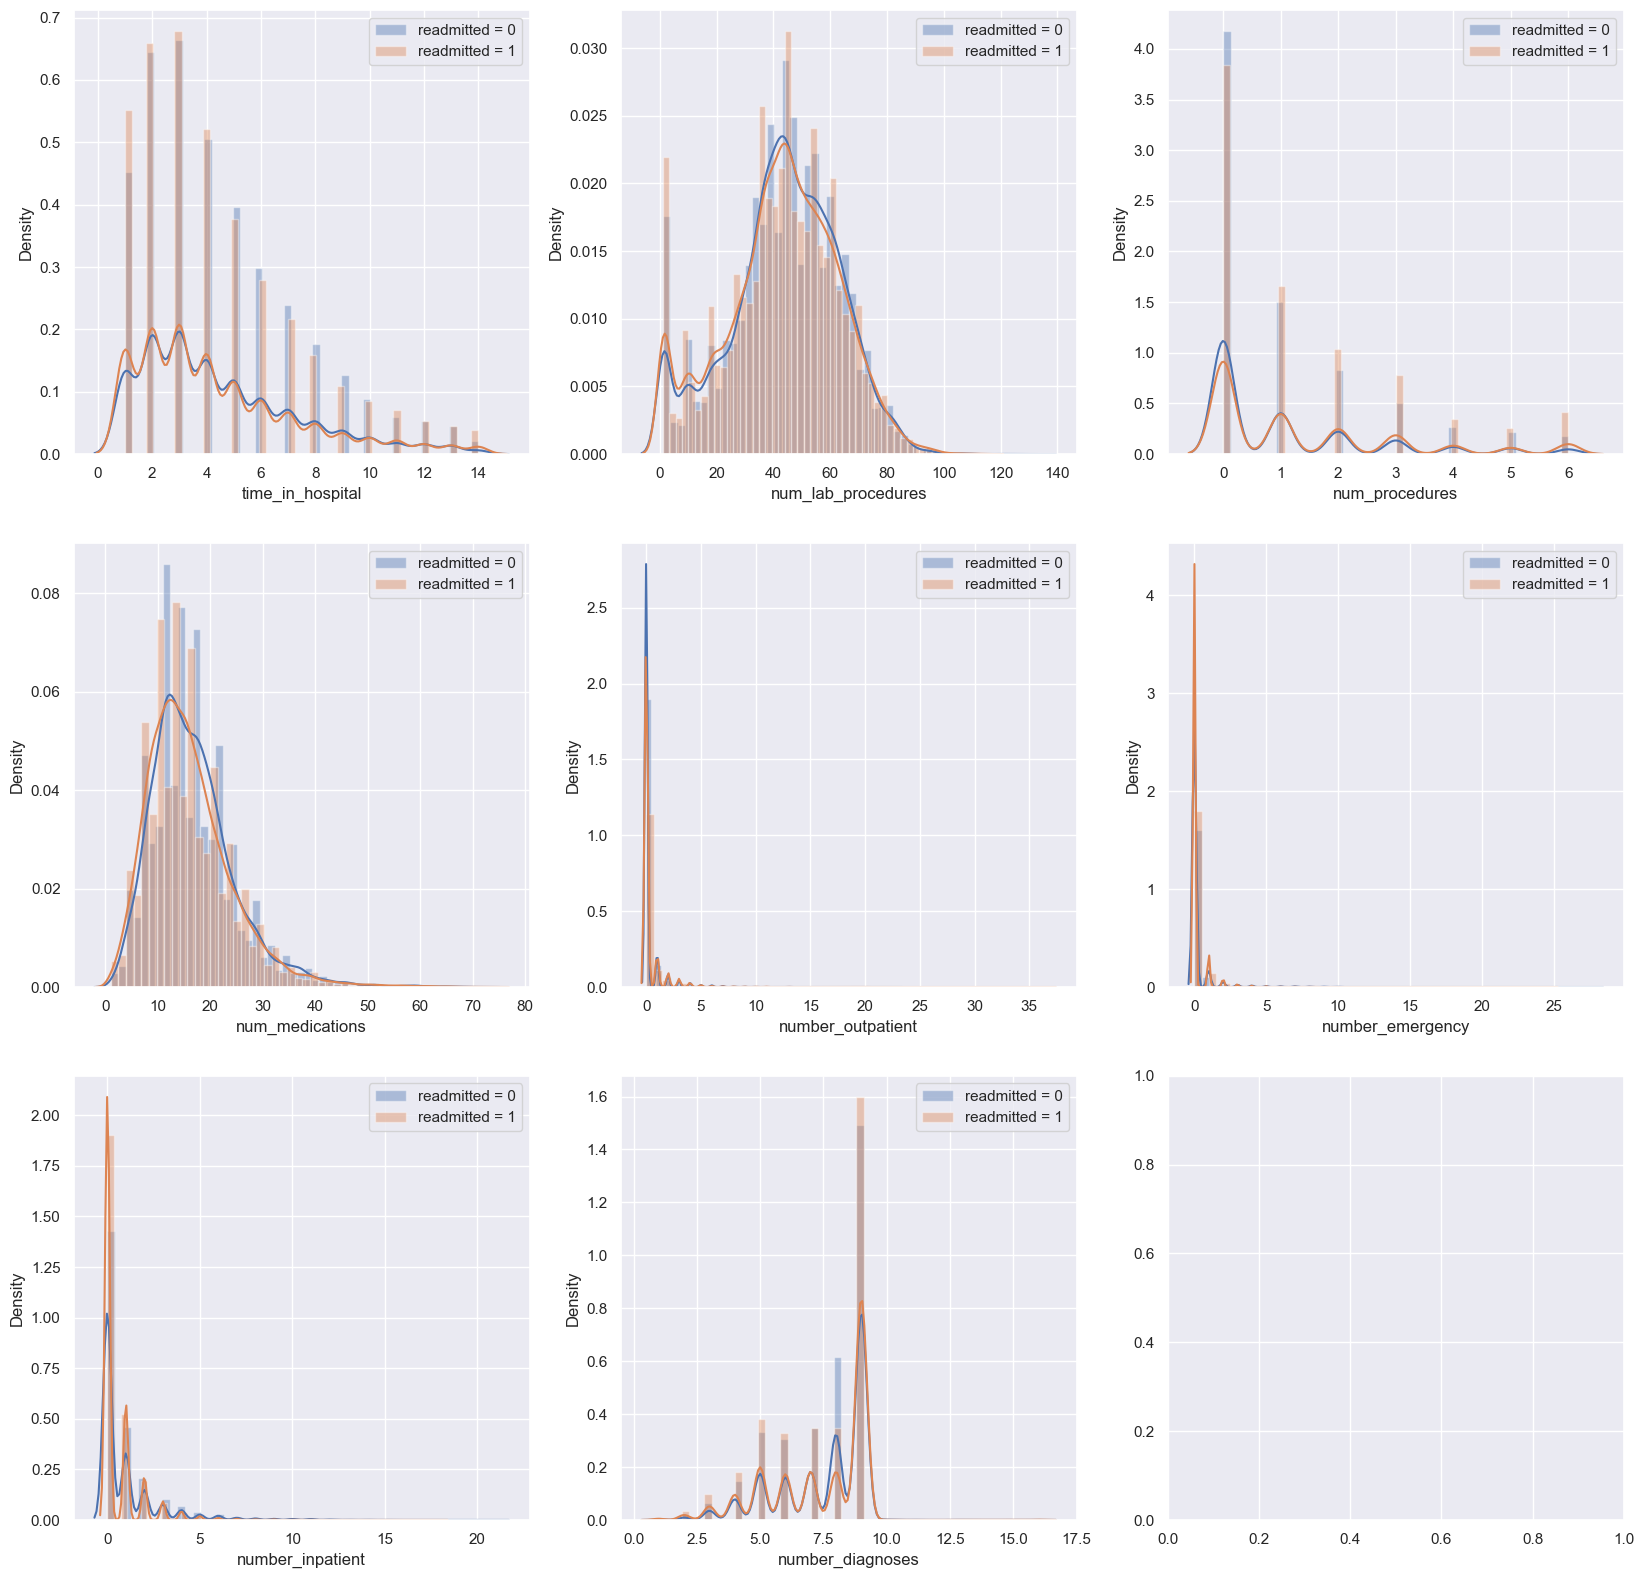

In [40]:
fig,ax = plt.subplots(3,3,figsize=(20,20),dpi=100)
for i in range(1,9):
    plt.subplot(3,3,i)
    sns.distplot(SMOTE_X[num_col[i-1]][SMOTE_y==0],label = 'readmitted = 0')
    sns.distplot(SMOTE_X[num_col[i-1]][SMOTE_y==1],label = 'readmitted = 1')
    plt.legend()

In [41]:
# kruskall wallies test for distribution
from scipy import stats

greater = SMOTE_X[SMOTE_y==0]
less = SMOTE_X[SMOTE_y==1]

p_values=[]
stat = []
reject = []
for i in num_col:
    kw = stats.kruskal(greater[i],less[i])
    p_value = kw.pvalue.round(4)
    p_values.append(p_value)
    statistic = kw.statistic.round(4)
    stat.append(statistic)
    if p_value<0.01:
        reject.append('Yes')

In [42]:
pd.DataFrame([stat,p_values,reject],columns = num_col,index = ['statistic','p_value','reject H0?'])

,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
statistic,58.9629,28.1192,644.7884,193.3707,141.1134,0.7673,809.5842,17.5775
p_value,0.0,0.0,0.0,0.0,0.0,0.3811,0.0,0.0000
reject H0?,Yes,Yes,Yes,Yes,Yes,Yes,Yes,NaN


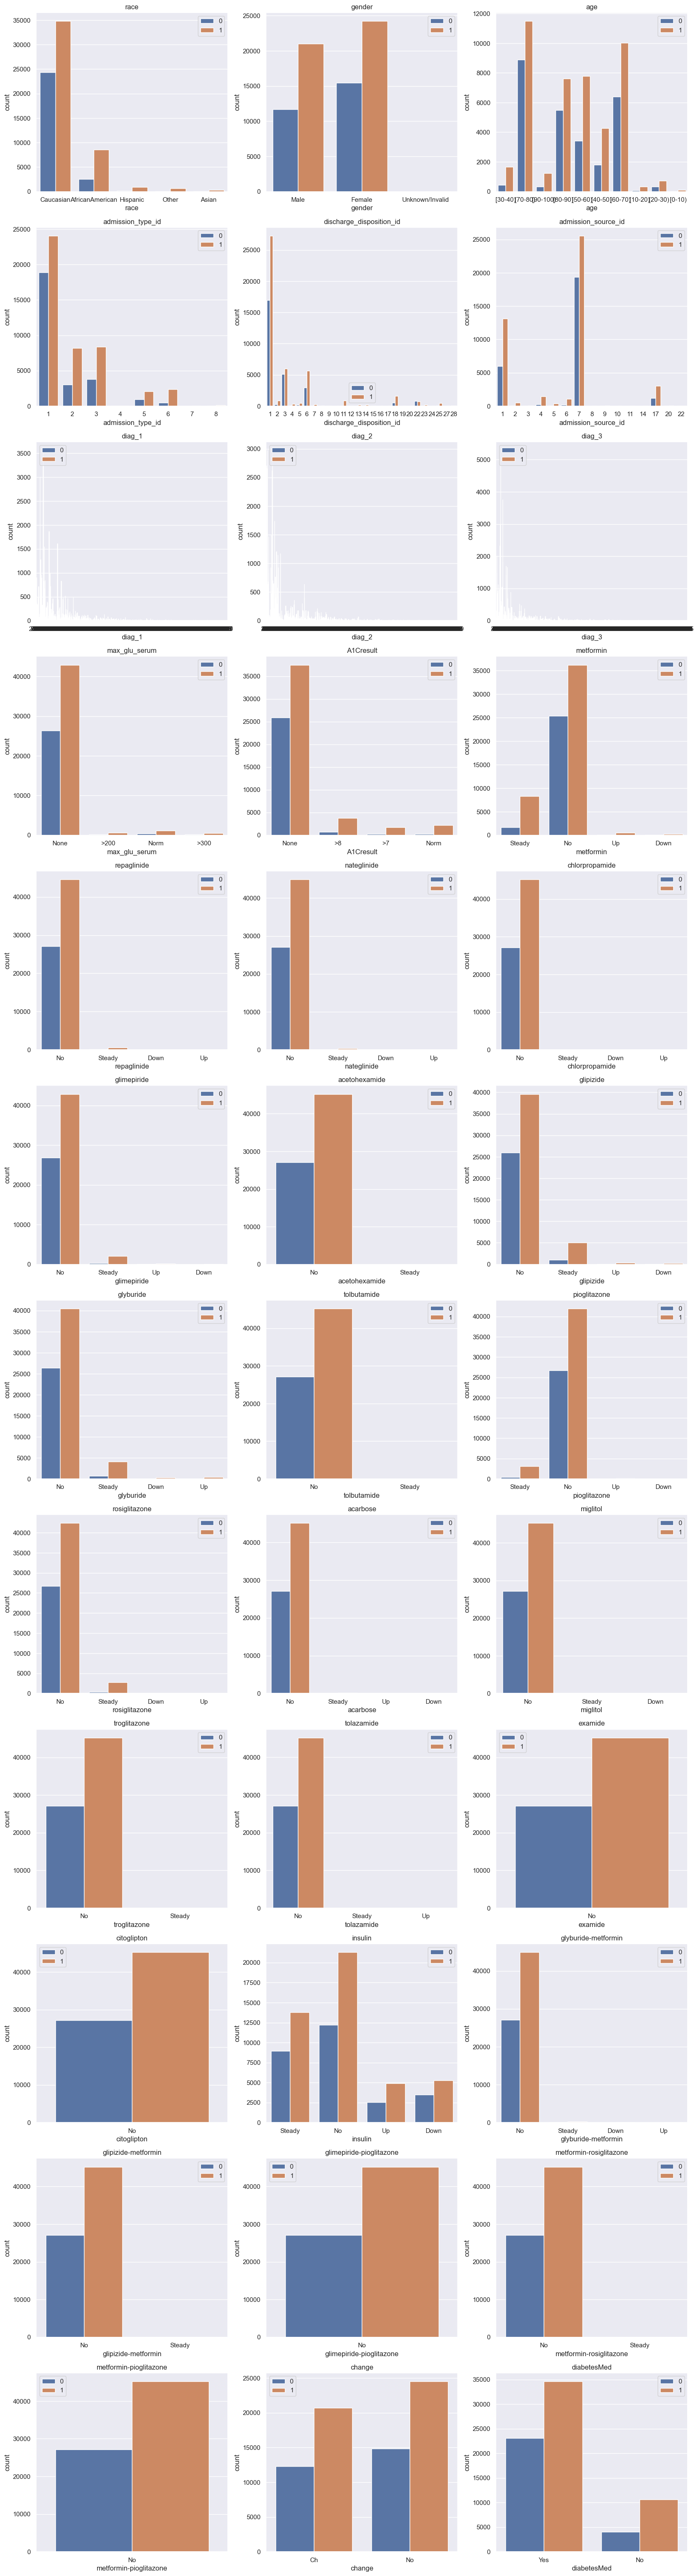

In [43]:
fig,ax = plt.subplots(12,3,figsize=(20,80),dpi=100)
for i in range(1,37):
    plt.subplot(12,3,i)
    sns.countplot(x = SMOTE_X[obj_col[i-1]], hue = SMOTE_y)
    plt.title(obj_col[i-1])
    plt.legend()

# Feature engineering

In [44]:
SMOTE_X.shape,X_test_1.shape

((72366, 44), (50883, 44))

In [45]:
# concat train_test before feature engineering
train_test = pd.concat([SMOTE_X, X_test_1], axis=0)

#### Transformation on categorical variables

In [46]:
def diag_code(data1, cols):
    for col in cols:
        data1.loc[(data1[col].str.contains("V")) | (data1[col].str.contains("E")), col] = 1000
        data1.loc[(data1[col]=='Unknown'), col] = 0
        data1[col] = data1[col].astype(np.float16)

    for col in cols:
        data1["diag"] = np.nan
        data1.loc[(data1[col]>=390) & (data1[col]<=459) | (data1[col]==785), "diag"] = "Circulatory"
        data1.loc[(data1[col]>=460) & (data1[col]<=519) | (data1[col]==786), "diag"] = "Respiratory"
        data1.loc[(data1[col]>=520) & (data1[col]<=579) | (data1[col]==787), "diag"] = "Digestive"
        data1.loc[(data1[col]>=250) & (data1[col]<251), "diag"] = "Diabetes"
        data1.loc[(data1[col]>=800) & (data1[col]<=999), "diag"] = "Injury"
        data1.loc[(data1[col]>=710) & (data1[col]<=739), "diag"] = "Muscoloskeletal"
        data1.loc[(data1[col]>=580) & (data1[col]<=629) | (data1[col] == 788), "diag"] = "Genitourinary"
        data1.loc[(data1[col]>=140) & (data1[col]<=239), "diag"] = "Neoplasms"
        

        data1["diag"] = data1["diag"].fillna("Other")
        data1[col] = data1["diag"]
        data1 = data1.drop("diag", axis=1)

    return data1

In [47]:
train_test = diag_code(train_test,["diag_1","diag_2","diag_3"])

In [48]:
train_test['diag_1'].value_counts()

Circulatory        38423
Other              21640
Respiratory        17148
Digestive          11282
Diabetes           10411
Injury              8382
Genitourinary       6123
Muscoloskeletal     5841
Neoplasms           3999
Name: diag_1, dtype: int64

In [49]:
train_test['diag_2'].value_counts()

Circulatory        39376
Other              32675
Diabetes           15047
Respiratory        12953
Genitourinary      10360
Digestive           4899
Neoplasms           3093
Injury              2863
Muscoloskeletal     1983
Name: diag_2, dtype: int64

In [50]:
train_test['diag_3'].value_counts()

Circulatory        36992
Other              36165
Diabetes           21009
Respiratory         9132
Genitourinary       8611
Digestive           4633
Injury              2334
Muscoloskeletal     2187
Neoplasms           2186
Name: diag_3, dtype: int64

In [51]:
train_test.admission_type_id.value_counts()

1    69778
3    21667
2    20478
5     5508
6     5462
8      325
7       21
4       10
Name: admission_type_id, dtype: int64

In [52]:
train_test['admission_type_id'].replace(1,'Emergency',inplace = True)
train_test['admission_type_id'].replace(2,'Urgent',inplace = True)
train_test['admission_type_id'].replace(3,'Elective',inplace = True)
train_test['admission_type_id'].replace(4,'Newborn',inplace = True)
train_test['admission_type_id'].replace(5,'Not Available',inplace = True)
train_test['admission_type_id'].replace(6,'NULL',inplace = True)
train_test['admission_type_id'].replace(7,'Trauma Center',inplace = True)
train_test['admission_type_id'].replace(8,'Not Mapped',inplace = True)

In [53]:
train_test.admission_type_id.value_counts()

Emergency        69778
Elective         21667
Urgent           20478
Not Available     5508
NULL              5462
Not Mapped         325
Trauma Center       21
Newborn             10
Name: admission_type_id, dtype: int64

In [54]:
# reference: https://www.hcup-us.ahrq.gov/db/vars/siddistnote.jsp?var=asource
# (17,20 - since no resources identifies code 17 and 20, they are considered as 'other')
train_test['admission_source_id'].replace(1, 'Referral', inplace=True)
train_test['admission_source_id'].replace(2, 'Referral', inplace=True)
train_test['admission_source_id'].replace(3, 'Referral', inplace=True)
train_test['admission_source_id'].replace(4, 'Transfer', inplace=True)
train_test['admission_source_id'].replace(5, 'Transfer', inplace=True)
train_test['admission_source_id'].replace(6, 'Transfer', inplace=True)
train_test['admission_source_id'].replace(7, 'Emergency room', inplace=True)
train_test['admission_source_id'].replace(8, 'Court/Law enforcement', inplace=True)
train_test['admission_source_id'].replace(9, 'Unknown', inplace=True)
train_test['admission_source_id'].replace(10, 'Transfer', inplace=True)
train_test['admission_source_id'].replace(11, 'delivery', inplace=True)
train_test['admission_source_id'].replace(13, 'delivery', inplace=True)
train_test['admission_source_id'].replace(14, 'delivery', inplace=True)
train_test['admission_source_id'].replace(17, 'Unknown', inplace=True)
train_test['admission_source_id'].replace(20, 'Unknown', inplace=True)
train_test['admission_source_id'].replace(22, 'Transfer', inplace=True)
train_test['admission_source_id'].replace(25, 'Transfer', inplace=True)

In [55]:
train_test['admission_source_id'].value_counts()

Emergency room           73517
Referral                 35293
Unknown                   7928
Transfer                  6490
Court/Law enforcement       16
delivery                     5
Name: admission_source_id, dtype: int64

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Emergency room'),
  Text(1, 0, 'Referral'),
  Text(2, 0, 'Transfer'),
  Text(3, 0, 'Unknown'),
  Text(4, 0, 'Court/Law enforcement'),
  Text(5, 0, 'delivery')])

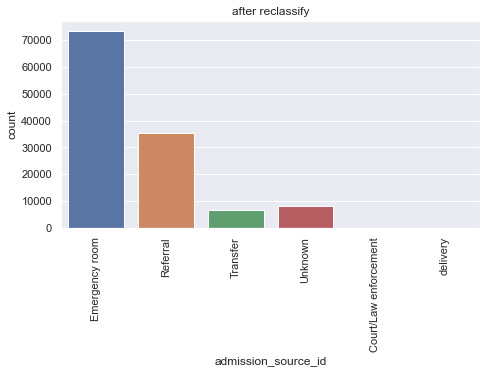

In [56]:
sns.countplot('admission_source_id', data=train_test).set(title = 'after reclassify')
plt.xticks(rotation=90)

In [57]:
# 17-19 no resouces for code 17-19. replaced by unknown
# reference: https://www.hcup-us.ahrq.gov/db/vars/siddistnote.jsp?var=dispuniform
train_test['discharge_disposition_id'].replace(1, 'Routine', inplace = True)
train_test['discharge_disposition_id'].replace(2, 'Transfer_stHospital', inplace = True)
train_test['discharge_disposition_id'].replace(3, 'Transfer_Other', inplace = True)
train_test['discharge_disposition_id'].replace(4, 'Transfer_Other', inplace = True)
train_test['discharge_disposition_id'].replace(5, 'Transfer_Other', inplace = True)
train_test['discharge_disposition_id'].replace(6, 'HHC', inplace = True)
train_test['discharge_disposition_id'].replace(7, 'AMA', inplace = True)
train_test['discharge_disposition_id'].replace(8, 'HHC', inplace = True)
train_test['discharge_disposition_id'].replace(9, 'Transfer_stHospital', inplace = True)
train_test['discharge_disposition_id'].replace(10, 'Transfer_Other', inplace = True)
train_test['discharge_disposition_id'].replace(11, 'Expired', inplace = True)
train_test['discharge_disposition_id'].replace(12, 'Transfer_Other', inplace = True)
train_test['discharge_disposition_id'].replace(13, 'Transfer_Other', inplace = True)
train_test['discharge_disposition_id'].replace(14, 'Transfer_Other', inplace = True)
train_test['discharge_disposition_id'].replace(15, 'Transfer_Other', inplace = True)
train_test['discharge_disposition_id'].replace(16, 'Transfer_Other', inplace = True)
train_test['discharge_disposition_id'].replace(17, 'Transfer_Other', inplace = True)
train_test['discharge_disposition_id'].replace(18, 'NULL', inplace = True)
train_test['discharge_disposition_id'].replace(19, 'Expired', inplace = True)
train_test['discharge_disposition_id'].replace(20, 'Expired', inplace = True)
train_test['discharge_disposition_id'].replace(22, 'Transfer_Other', inplace = True)
train_test['discharge_disposition_id'].replace(23, 'Transfer_Other', inplace = True)
train_test['discharge_disposition_id'].replace(24, 'Transfer_Other', inplace = True)
train_test['discharge_disposition_id'].replace(25, 'Not mapped', inplace = True)
train_test['discharge_disposition_id'].replace(27, 'Transfer_Other', inplace = True)
train_test['discharge_disposition_id'].replace(28, 'Transfer_Other', inplace = True)

In [58]:
train_test['discharge_disposition_id'].value_counts()

Routine                74429
Transfer_Other         24149
HHC                    15134
NULL                    3985
Transfer_stHospital     2244
Expired                 1652
Not mapped              1021
AMA                      635
Name: discharge_disposition_id, dtype: int64

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'Routine'),
  Text(1, 0, 'Not mapped'),
  Text(2, 0, 'HHC'),
  Text(3, 0, 'Transfer_Other'),
  Text(4, 0, 'NULL'),
  Text(5, 0, 'Transfer_stHospital'),
  Text(6, 0, 'Expired'),
  Text(7, 0, 'AMA')])

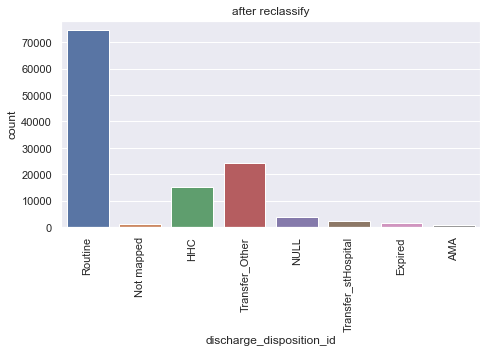

In [59]:
sns.countplot('discharge_disposition_id', data=train_test).set(title = 'after reclassify')
plt.xticks(rotation=90)

In [60]:
obj_col

Index(['race', 'gender', 'age', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'diag_1', 'diag_2',
       'diag_3', 'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide',
       'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide',
       'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone',
       'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide',
       'examide', 'citoglipton', 'insulin', 'glyburide-metformin',
       'glipizide-metformin', 'glimepiride-pioglitazone',
       'metformin-rosiglitazone', 'metformin-pioglitazone', 'change',
       'diabetesMed'],
      dtype='object')

In [61]:
medications = ['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 
               'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 
               'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose', 
               'miglitol', 'troglitazone', 'tolazamide', 'examide', 
               'insulin', 'glyburide-metformin', 'glipizide-metformin', 'glimepiride-pioglitazone', 
               'metformin-rosiglitazone', 'metformin-pioglitazone', 'citoglipton']

In [62]:
def use_or_not(data, col):
    maps = {'No': 0, 'Up': 1, 'Steady': 1, 'Down': 1}
    data['use_or_not'+col] = data[col].map(maps)

In [63]:
for i in medications:
    use_or_not(train_test,i)

In [64]:
medications_use_ornot=['use_or_not' + i for i in medications]

In [65]:
## new variable: the number of doses the patient take 
train_test ['number_24medications'] = np.zeros(train_test.shape[0])
for i in medications_use_ornot:
    train_test ['number_24medications'] = train_test['number_24medications'] + train_test[i]

In [66]:
for i in medications_use_ornot:
    del train_test[i]

In [67]:
def change_or_not(data,col):
    maps = {'No': 0, 'Up': 1, 'Steady': 0, 'Down': 1}
    data['change_or_not'+col] = data[col].map(maps)

In [68]:
for i in medications:
    change_or_not(train_test,i)

In [69]:
medications_change_or_not=['change_or_not' + i for i in medications]

In [70]:
## new variable: the number of changes of doses the patient take 
train_test ['number_change_24medications'] = np.zeros(train_test.shape[0])
for i in medications_change_or_not:
    train_test ['number_change_24medications'] = train_test['number_change_24medications'] + train_test[i]

In [71]:
for i in medications_change_or_not:
    del train_test[i]

In [72]:
for i in medications:
    del train_test[i]

In [73]:
num_col = train_test.columns[train_test.dtypes!=object]
print(num_col,'\n','total number of numerical columns:',len(num_col))

Index(['time_in_hospital', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_outpatient', 'number_emergency',
       'number_inpatient', 'number_diagnoses', 'number_24medications',
       'number_change_24medications'],
      dtype='object') 
 total number of numerical columns: 10


In [74]:
obj_col = train_test.columns[train_test.dtypes==object]
print(obj_col,'\n','total number of categorical columns:',len(obj_col))

Index(['race', 'gender', 'age', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'diag_1', 'diag_2',
       'diag_3', 'max_glu_serum', 'A1Cresult', 'change', 'diabetesMed'],
      dtype='object') 
 total number of categorical columns: 13


In [75]:
for i in obj_col:
    display(train_test[i].value_counts())

Caucasian          98383
AfricanAmerican    20661
Hispanic            2058
Other               1506
Asian                641
Name: race, dtype: int64

Female             67077
Male               56169
Unknown/Invalid        3
Name: gender, dtype: int64

[70-80)     33441
[60-70)     27629
[80-90)     21656
[50-60)     19814
[40-50)     10954
[30-40)      4026
[90-100)     2965
[20-30)      1873
[10-20)       730
[0-10)        161
Name: age, dtype: int64

Emergency        69778
Elective         21667
Urgent           20478
Not Available     5508
NULL              5462
Not Mapped         325
Trauma Center       21
Newborn             10
Name: admission_type_id, dtype: int64

Routine                74429
Transfer_Other         24149
HHC                    15134
NULL                    3985
Transfer_stHospital     2244
Expired                 1652
Not mapped              1021
AMA                      635
Name: discharge_disposition_id, dtype: int64

Emergency room           73517
Referral                 35293
Unknown                   7928
Transfer                  6490
Court/Law enforcement       16
delivery                     5
Name: admission_source_id, dtype: int64

Circulatory        38423
Other              21640
Respiratory        17148
Digestive          11282
Diabetes           10411
Injury              8382
Genitourinary       6123
Muscoloskeletal     5841
Neoplasms           3999
Name: diag_1, dtype: int64

Circulatory        39376
Other              32675
Diabetes           15047
Respiratory        12953
Genitourinary      10360
Digestive           4899
Neoplasms           3093
Injury              2863
Muscoloskeletal     1983
Name: diag_2, dtype: int64

Circulatory        36992
Other              36165
Diabetes           21009
Respiratory         9132
Genitourinary       8611
Digestive           4633
Injury              2334
Muscoloskeletal     2187
Neoplasms           2186
Name: diag_3, dtype: int64

None    117410
Norm      2895
>200      1609
>300      1335
Name: max_glu_serum, dtype: int64

None    105833
>8        8487
Norm      5071
>7        3858
Name: A1Cresult, dtype: int64

No    66675
Ch    56574
Name: change, dtype: int64

Yes    96919
No     26330
Name: diabetesMed, dtype: int64

In [76]:
train_test_new=pd.get_dummies(train_test).copy()

In [77]:
X_train_2 = train_test_new.iloc[:SMOTE_X.shape[0],:]
X_test_2 = train_test_new.iloc[SMOTE_X.shape[0]:,:]
X_train_2.shape, SMOTE_X.shape, X_test_2.shape, X_test_1.shape

((72366, 89), (72366, 44), (50883, 89), (50883, 44))

#### Transformation on numerical variables

In [78]:
num_col

Index(['time_in_hospital', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_outpatient', 'number_emergency',
       'number_inpatient', 'number_diagnoses', 'number_24medications',
       'number_change_24medications'],
      dtype='object')

In [79]:
X_train_2[num_col].skew()

time_in_hospital                1.118390
num_lab_procedures             -0.262218
num_procedures                  1.424109
num_medications                 1.266841
number_outpatient               8.146769
number_emergency               10.477637
number_inpatient                3.640112
number_diagnoses               -0.920381
number_24medications            0.850761
number_change_24medications     1.483055
dtype: float64

In [80]:
right_skewed = num_col[X_train_2[num_col].skew()>0]
right_skewed

Index(['time_in_hospital', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient',
       'number_24medications', 'number_change_24medications'],
      dtype='object')

In [81]:
def boxcox(column, data):
    if data[column].min()==0:
        data[column]=data[column]+1
    data['bc_'+column]=stats.boxcox(data[column])[0]

In [82]:
for i in right_skewed:
    boxcox(i, X_train_2)

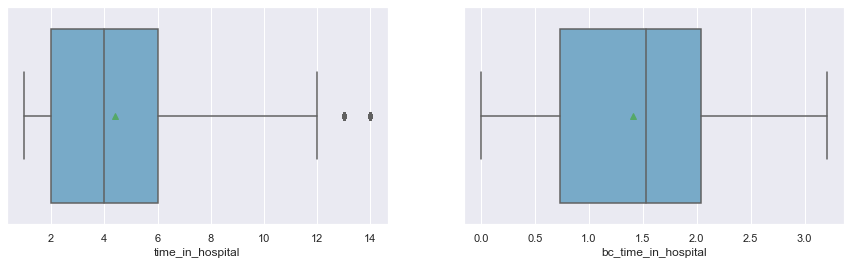

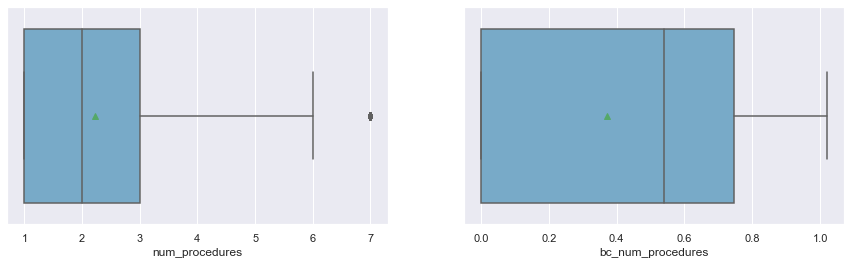

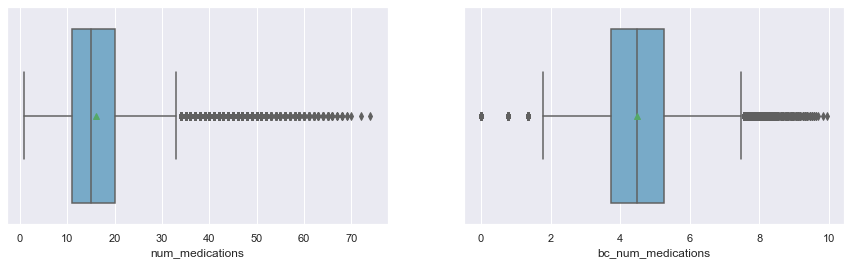

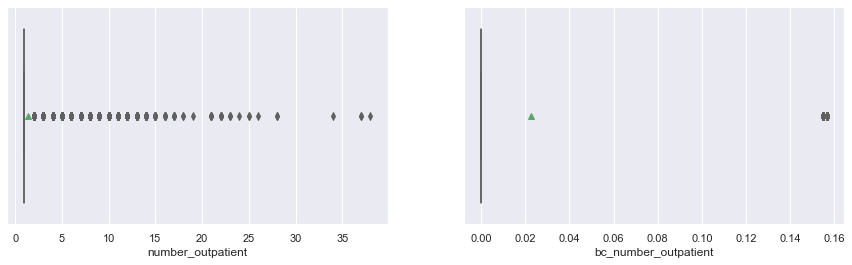

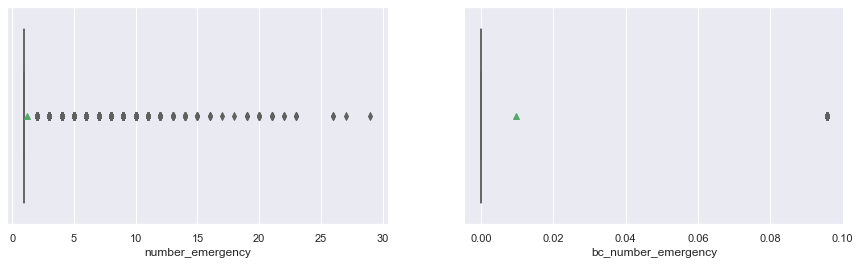

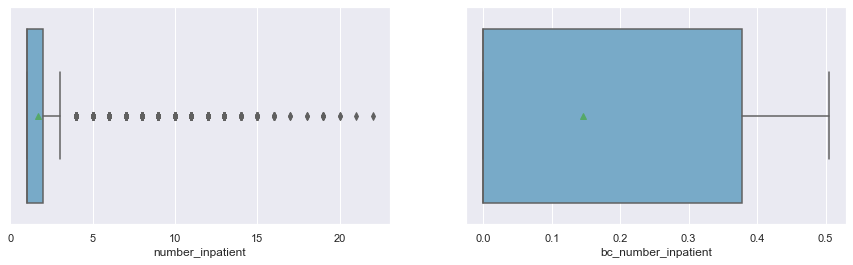

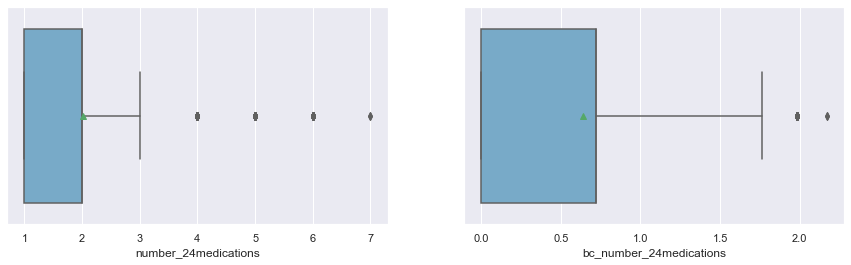

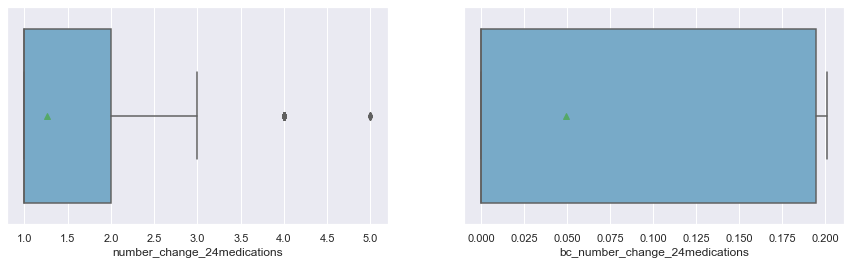

In [83]:
for i in right_skewed:
    fig, axes = plt.subplots(1,2,figsize = (15,4))
  
    sns.boxplot(i, data=X_train_2, palette='Blues', showmeans=True,ax=axes[0])
     
    sns.boxplot('bc_'+i, data=X_train_2, palette='Blues', showmeans=True,ax=axes[1])

In [84]:
len(X_train_2[X_train_2['bc_number_outpatient']>0.08])

10573

In [85]:
len(X_train_2[X_train_2['bc_number_emergency']>0.08])

7393

In [86]:
len(X_train_2[X_train_2['bc_number_change_24medications']>0.175])

18256

In [87]:
def skewness_compare(data,col):
    print(col+':',data[col].skew(),'bc_'+col+':',data['bc_'+col].skew())
    

In [88]:
for i in right_skewed:
    skewness_compare(X_train_2,i)

time_in_hospital: 1.11838998356612 bc_time_in_hospital: -0.024387656006650223
num_procedures: 1.424109074205191 bc_num_procedures: 0.2674890425197619
num_medications: 1.2668405293774294 bc_num_medications: 0.030600925876934384
number_outpatient: 8.146769485173431 bc_number_outpatient: 2.0040846827092214
number_emergency: 10.477636744467612 bc_number_emergency: 2.627265436447476
number_inpatient: 3.640111950508941 bc_number_inpatient: 0.702168356333793
number_24medications: 0.8507608831671558 bc_number_24medications: -0.012913570661586443
number_change_24medications: 1.4830550986139337 bc_number_change_24medications: 1.1409306052875035


In [89]:
for i in right_skewed:
    boxcox(i, X_test_2)

In [90]:
for i in right_skewed:
    del X_train_2[i]
    del X_test_2[i]

In [91]:
for i in X_train_2.columns:
    if len(X_train_2[i].unique())==1:
        print(i)
        del X_train_2[i]
        del X_test_2[i]

In [92]:
### remove low-variance features.
from sklearn.feature_selection import VarianceThreshold
sel = VarianceThreshold(threshold=(.96 * (1 - .96)))
sel.fit(X_train_2)
X_train_3 = sel.transform(X_train_2)
X_test_3 = sel.transform(X_test_2)

In [93]:
X_train_3.shape,X_test_3.shape

((72366, 52), (50883, 52))

In [94]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaler.fit(X_train_3)

### normalize + remove sparsity
X_train_3  = scaler.transform(X_train_3)
X_test_3 = scaler.transform(X_test_3)

In [95]:
scaler = MinMaxScaler()

scaler.fit(X_train_2)

# normalize
X_train_4  = scaler.transform(X_train_2)
X_test_4 = scaler.transform(X_test_2)

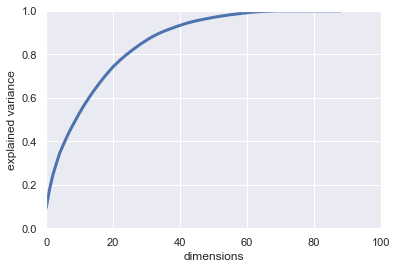

In [96]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(X_train_4)
cumsum = np.cumsum(pca.explained_variance_ratio_)
# Plot the explained variance vs number of dimensions
plt.figure(figsize = (6,4))
plt.plot(cumsum, linewidth=3)
plt.axis([0, 100, 0, 1])
plt.xlabel("dimensions")
plt.ylabel("explained variance")
plt.grid(True)
plt.show()

In [97]:
# pca after normalize
pca = PCA(n_components=0.95).fit(X_train_4)

X_train_pca = pca.transform(X_train_4)
X_test_pca = pca.transform(X_test_4)

In [98]:
X_train_pca.shape,X_test_pca.shape

((72366, 45), (50883, 45))

In [99]:
### normalize + remove sparsity
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0,penalty='l1',solver='saga').fit(X_train_3, SMOTE_y)
clf.score(X_train_3, SMOTE_y)

0.7726418483818368

In [100]:
clf.score(X_test_3, y_test_1)
# 0.82

0.8282727040465382

In [101]:
### normalize
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0,penalty='l1',solver='saga').fit(X_train_4, SMOTE_y)
clf.score(X_train_4, SMOTE_y)

0.7821628941768234

In [102]:
clf.score(X_test_4, y_test_1)
# 0.85

0.8519151779572746

In [103]:
# pca after normalize
clf = LogisticRegression(random_state=0,penalty='l1',solver='saga').fit(X_train_pca, SMOTE_y)
clf.predict(X_train_pca)
clf.predict_proba(X_train_pca)
clf.score(X_train_pca, SMOTE_y)

0.7020562142442583

In [104]:
clf.score(X_test_pca, y_test_1)

0.7693139162392154

# Random Forest Section!!!

In [ ]:
# from sklearn.ensemble import  RandomForestClassifier


# model = RandomForestClassifier(n_estimators = 1000)

# model.fit(X_train_4, SMOTE_y)

In [ ]:
# model.score(X_train_4, SMOTE_y)

0.9999861813558854

In [ ]:
# model.score(X_test_4, y_test_1)
#0.859

0.8624884539040544

In [ ]:
# from sklearn.ensemble import  RandomForestClassifier

# model = RandomForestClassifier(n_estimators = 1000)

# tuning_parameters = {
#     'min_samples_leaf': [1, 5, 10, 20],
#     'max_features': np.arange(1, X_train_pca.shape[1], 5),
# }

# from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, cross_val_predict
# rf_search = RandomizedSearchCV(model, tuning_parameters, n_iter= 16, cv = 5, return_train_score=False, n_jobs = 4, 
#                                random_state=41)
# rf_search.fit(X_train_pca, SMOTE_y)

# rf = rf_search.best_estimator_

# print('Best parameters found by randomised search:', rf_search.best_params_, '\n')

# Naive Bayes

In [106]:
from sklearn import naive_bayes as nb
gNB, berNB, multiNB, compNB, catNB =    nb.GaussianNB(), nb.BernoulliNB(),\
                                        nb.MultinomialNB(), nb.ComplementNB(),\
                                        nb.CategoricalNB()
nbList = [gNB, berNB, multiNB, compNB, catNB]
for nb in nbList:
    nb.fit(X_train_4, SMOTE_y)
    print("{}".format(nb.score(X_test_4, y_test_1)))

0.2384096849635438
0.6862213312894286
0.7367490124403042
0.6321561228701138
0.7030442387437847


# ANN

In [ ]:
X_train_4.shape

In [ ]:
num_features = 44
num_classes = 2
n_hidden_1 = 10

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import time

In [ ]:
x_data = np.array(X_train_pca)
x_data_torch = torch.from_numpy(x_data).float() 
y_data = np.array(SMOTE_y)
y_data_torch = torch.from_numpy(y_data)

x_test = np.array(X_test_pca)
x_test_torch = torch.from_numpy(x_test).float() 
y_test = np.array(y_test_1)
y_test_torch = torch.from_numpy(y_test)

In [ ]:
class Model(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(Model, self).__init__()
        self.linear1 = nn.Linear(input_size, hidden_size)
        self.linear2 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        z1 = self.linear1(x)
        Zout = self.linear2(F.relu(z1))
        return Zout


start = time.time()
model = Model(num_features, n_hidden_1, num_classes)

learning_rate=0.01
no_of_epochs = 1000


criterion = nn.CrossEntropyLoss() 
optimiser = optim.Adam(model.parameters(), lr=learning_rate)

from sklearn.metrics import accuracy_score

for epoch in range(no_of_epochs):  

    inputs = x_data_torch
    labels = y_data_torch

    model.train()
    optimiser.zero_grad()

    outputs = model(inputs)
    loss = criterion(outputs, labels) 
    loss.backward()
    optimiser.step()

    if epoch % 200 == 199:    
        model.eval()
        pred_outputs = model(inputs)
        predicted = torch.argmax(pred_outputs, 1)
        train_acc = accuracy_score(predicted.numpy(),y_data)
        print('%d, loss: %.4f, train_acc: %.4f' %(epoch + 1, loss.item(), train_acc))

print('Finished Training')
pred_outputs = model(x_test_torch)
_, predicted = torch.max(pred_outputs, 1)
# print('Predicted :', predicted.numpy())
# print('Truth :', y_data)

train_acc = accuracy_score(predicted.numpy(),y_test_torch)
print('Test Accuracy : %.2f' %train_acc)
end = time.time()
use_time = end- start
print("all done at %.2f seconds" %use_time)

## Other models...